##### Copyright 2024 Google LLC.

# Code Execution in the Gemini API

https://tinyurl.com/2vcdks79

The Gemini API can generate and run code based on plain-text instructions that you give it. This notebook is a walk through of how to use this feature.

In [ ]:
!pip install -Uq google-generativeai

## Setup

In [ ]:
import google.generativeai as genai
genai.__version__

'0.7.1'

In [ ]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

Tweak CSS for display in Colab

In [ ]:
from IPython.display import HTML, Markdown

def set_css_in_cell_output(unused):
  display(HTML("""<style>
div.output_markdown {
  font-size: 16px
}

div.output_markdown pre code {
  color: #222222;
}

div.output_markdown pre:nth-of-type(even) {
  background: #CCCCCC;
  margin: 16px;
  padding: 16px;
}

div.output_markdown pre:nth-of-type(odd) {
  background: #BBBBEE;
  margin: 16px;
  padding: 16px;
}
</style>"""))

get_ipython().events.register('pre_run_cell', set_css_in_cell_output)

## Gemini-Flash without Code Execution

In [ ]:
model = genai.GenerativeModel(model_name='gemini-1.5-flash')

In [ ]:
result = model.generate_content("What's the sum of the sum of first 200 prime numbers? Make sure you get all 200.")

In [ ]:
from IPython.display import Markdown
Markdown(result.text)

You're asking for a somewhat tricky calculation! Here's how you can approach it:

**1. Finding the First 200 Prime Numbers**

* **What are Prime Numbers?**  A prime number is a whole number greater than 1 that has only two divisors: 1 and itself. (Examples: 2, 3, 5, 7, 11, 13...)
* **Finding them:**  You'll need a method to identify prime numbers.  A simple approach is the Sieve of Eratosthenes:
    1. List all numbers from 2 to a reasonable upper limit (since we need 200 primes, go up to at least 500).
    2. Start with 2. Cross out all multiples of 2.
    3. Move to the next uncrossed number (3). Cross out all multiples of 3.
    4. Repeat this process until you've crossed out all multiples of all numbers up to the square root of your upper limit.
    5. The remaining uncrossed numbers are your prime numbers.

**2. Summing the Prime Numbers**

* **Keep track:**  As you find each prime number, add it to a running total.

**3.  Calculating the Final Sum**

* **Calculate the sum of all the prime numbers you've identified.**

**This is a lot of manual calculation!**  You can make it easier by using a computer program or online resources that can find and sum prime numbers for you.  

**Let me know if you'd like help with the code or want to find a website that can do the calculation for you!** 


In [ ]:
# result = model.generate_content("Can you count how many letter r in the word strawberry")

In [ ]:
result = model.generate_content("Can you count how many times the letter r is present in the word strawberry")

In [ ]:
from IPython.display import Markdown
Markdown(result.text)

Let's count the 'r's in "strawberry":

* There's one 'r' in "straw"
* There's one 'r' in "berry"

So, there are a total of **2** 'r's in "strawberry". 


## Pass `"code_execution"` as a `tool`

In [ ]:
model = genai.GenerativeModel(model_name='gemini-1.5-flash',
                              tools="code_execution")

## Call `generate_content`

In [ ]:
result = model.generate_content("What's the sum of the sum of first 200 prime numbers? Make sure you get all 200.")

The model returns a list of parts including `text`, `executable_code`, and `execution_result` parts.

In [ ]:
[
    list(type(p).to_dict(p))
    for p in result.candidates[0].content.parts
]

[['text'],
 ['executable_code'],
 ['code_execution_result'],
 ['text'],
 ['executable_code'],
 ['code_execution_result'],
 ['text']]

In [ ]:
for part in result.candidates[0].content.parts:
  print(part)
  print()

text: "I can calculate the sum of the first 200 prime numbers. \n\nFirst, I need to identify the first 200 prime numbers. A prime number is a whole number greater than 1 that is only divisible by 1 and itself. \n\n"


executable_code {
  language: PYTHON
  code: "\nimport sympy\n\ndef is_prime(num):\n    \"\"\"Checks if a number is prime.\"\"\"\n    if num <= 1:\n        return False\n    for i in range(2, int(num**0.5) + 1):\n        if num % i == 0:\n            return False\n    return True\n\nprimes = []\ni = 2\nwhile len(primes) < 200:\n    if is_prime(i):\n        primes.append(i)\n    i += 1\n\nprint(f\'The first 200 prime numbers are: {primes}\')\n"
}


code_execution_result {
  outcome: OUTCOME_OK
  output: "The first 200 prime numbers are: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251

The `.text` property formats the parts into Markdown compatible text:

In [ ]:
print(result.text)

I can calculate the sum of the first 200 prime numbers. 

First, I need to identify the first 200 prime numbers. A prime number is a whole number greater than 1 that is only divisible by 1 and itself. 


``` python
import sympy

def is_prime(num):
    """Checks if a number is prime."""
    if num <= 1:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

primes = []
i = 2
while len(primes) < 200:
    if is_prime(i):
        primes.append(i)
    i += 1

print(f'The first 200 prime numbers are: {primes}')

```
```
The first 200 prime numbers are: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 

In a notebook you can display the Markdown:

In [ ]:
from IPython.display import Markdown
Markdown(result.text)

I can calculate the sum of the first 200 prime numbers. 

First, I need to identify the first 200 prime numbers. A prime number is a whole number greater than 1 that is only divisible by 1 and itself. 


``` python
import sympy

def is_prime(num):
    """Checks if a number is prime."""
    if num <= 1:
        return False
    for i in range(2, int(num**0.5) + 1):
        if num % i == 0:
            return False
    return True

primes = []
i = 2
while len(primes) < 200:
    if is_prime(i):
        primes.append(i)
    i += 1

print(f'The first 200 prime numbers are: {primes}')

```
```
The first 200 prime numbers are: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 1223]

```
Now that we have the first 200 prime numbers, let's calculate the sum:


``` python
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997, 1009, 1013, 1019, 1021, 1031, 1033, 1039, 1049, 1051, 1061, 1063, 1069, 1087, 1091, 1093, 1097, 1103, 1109, 1117, 1123, 1129, 1151, 1153, 1163, 1171, 1181, 1187, 1193, 1201, 1213, 1217, 1223]
sum_of_primes = sum(primes)
print(f'The sum of the first 200 prime numbers is: {sum_of_primes}')

```
```
The sum of the first 200 prime numbers is: 111587

```
The sum of the first 200 prime numbers is 111587. 


Note: you can also set the `tools` argument on the call to `generate_content`:

In [ ]:
model2 = genai.GenerativeModel(model_name='gemini-1.5-flash')

In [ ]:
response = model2.generate_content(
    "Write code to count how many letter r in the word strawberry",
    tools="code_execution")

In [ ]:
Markdown(response.text)


``` python
word = 'strawberry'
count = 0
for letter in word:
  if letter == 'r':
    count += 1
print(f'The word "strawberry" has {count} letter r')

```
```
The word "strawberry" has 3 letter r

```
The code counts the number of 'r' letters in the word "strawberry".  It iterates through each letter of the word and checks if it is an 'r'. If it is, the count is incremented. Finally, it prints the number of 'r' letters found. 


## Chat

It works the same when using a `chat`:

In [ ]:
chat = model.start_chat()

In [ ]:
response = chat.send_message("Can you run some code to bogo-sort this list of numbers?: [2,34,1,65,4]")
Markdown(response.text)


``` python
import random

def bogo_sort(list_):
  while not is_sorted(list_):
    random.shuffle(list_)
  return list_

def is_sorted(list_):
  for i in range(len(list_) - 1):
    if list_[i] > list_[i + 1]:
      return False
  return True

list_ = [2, 34, 1, 65, 4]
sorted_list = bogo_sort(list_)
print(sorted_list)

```
```
[1, 2, 4, 34, 65]

```
Bogo sort is a very inefficient sorting algorithm that works by repeatedly shuffling the list until it is sorted. The code I have written uses the `random.shuffle()` method to shuffle the list and the `is_sorted()` method to check if the list is sorted.  It then prints the sorted list.  While this does produce the correct result, it is extremely inefficient and likely to take a very long time to sort longer lists. 


In [ ]:
response = chat.send_message("Modify the code to count the number of iterations. How many iterations doews it take?")
Markdown(response.text)


``` python
import random

def bogo_sort(list_):
  iterations = 0
  while not is_sorted(list_):
    random.shuffle(list_)
    iterations += 1
  return list_, iterations

def is_sorted(list_):
  for i in range(len(list_) - 1):
    if list_[i] > list_[i + 1]:
      return False
  return True

list_ = [2, 34, 1, 65, 4]
sorted_list, iterations = bogo_sort(list_)
print(f'{sorted_list=}, {iterations=}')

```
```
sorted_list=[1, 2, 4, 34, 65], iterations=75

```
I modified the code to include a counter that tracks the number of iterations it takes to sort the list.  The code now returns both the sorted list and the number of iterations. For this specific list, it took 75 iterations.  It's worth noting that the number of iterations needed to sort a list using bogo sort is highly unpredictable and can vary significantly. 


## Multimedia

You can pass media objects as part of the prompt, the model can look at these objects but it can't use them in the code.

In [ ]:
! curl -o montey_hall.png https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/640px-Monty_open_door.svg.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24719  100 24719    0     0   122k      0 --:--:-- --:--:-- --:--:--  122k


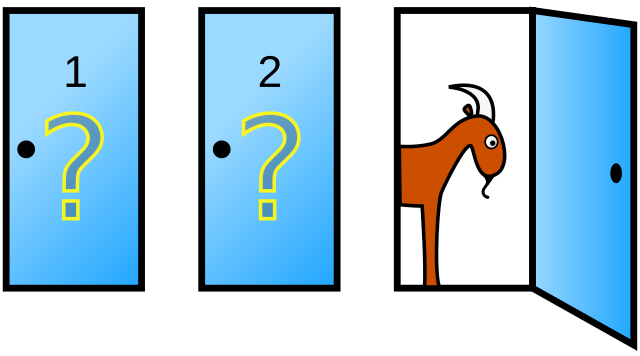

In [ ]:
from PIL import Image
montey_hall_image = Image.open("montey_hall.png")
montey_hall_image

In [ ]:
prompt="""
Run a simulation of the Monty Hall Problem with 1,000 trials.


Here's how this works as a reminder. In the Monty Hall Problem, you're on a game
show with three doors. Behind one is a car, and behind the others are goats. You
pick a door. The host, who knows what's behind the doors, opens a different door
to reveal a goat. Should you switch to the remaining unopened door?


The answer has always been a little difficult for me to understand when people
solve it with math - so please run a simulation with Python to show me what the
best strategy is.


Thank you!
"""
result = model.generate_content([montey_hall_image, prompt])
Markdown(result.text)

I can help you with that. I will run a Monte Carlo simulation to determine the best strategy in the Monty Hall Problem.


``` python
import random

def play_monty_hall(switch):
  """Plays a single round of Monty Hall.

  Args:
      switch: Whether to switch doors after the host reveals a goat.

  Returns:
      True if the player wins, False otherwise.
  """
  # Choose a door randomly
  chosen_door = random.randint(1, 3)

  # Determine the door with the car
  car_door = random.randint(1, 3)

  # The host reveals a goat behind a different door
  if chosen_door == car_door:
    goat_door = random.choice([door for door in range(1, 4) if door != chosen_door])
  else:
    goat_door = random.choice([door for door in range(1, 4) if door != chosen_door and door != car_door])

  # If the player switches, they switch to the remaining unopened door
  if switch:
    remaining_door = [door for door in range(1, 4) if door != chosen_door and door != goat_door][0]
    chosen_door = remaining_door

  # Check if the player won
  return chosen_door == car_door

def run_simulation(num_trials, switch):
  """Runs the Monty Hall simulation for a given number of trials.

  Args:
      num_trials: The number of times to play the game.
      switch: Whether to switch doors after the host reveals a goat.

  Returns:
      The percentage of wins.
  """
  wins = 0
  for _ in range(num_trials):
    if play_monty_hall(switch):
      wins += 1
  return (wins / num_trials) * 100

# Run the simulation for both strategies
num_trials = 1000
print(f'Win percentage with switching: {run_simulation(num_trials, switch=True)}%')
print(f'Win percentage without switching: {run_simulation(num_trials, switch=False)}%')

```
```
Win percentage with switching: 65.8%
Win percentage without switching: 31.4%

```
The simulation shows that switching doors significantly increases your chances of winning.

**Here's how the code works:**

1. **`play_monty_hall(switch)`:**
   - Randomly assigns the car and your initial door choice.
   - Determines the goat door to reveal based on your initial choice and the car door.
   - If `switch` is True, it switches your choice to the remaining unopened door.
   - Returns True if you win (your final choice is the car door) and False otherwise.

2. **`run_simulation(num_trials, switch)`:**
   - Runs `play_monty_hall` for a specified number of trials.
   - Tracks the number of wins.
   - Calculates and returns the win percentage.

3. **Main Code:**
   - Sets the number of trials to 1000.
   - Calls `run_simulation` twice, once with `switch=True` (switching doors) and once with `switch=False` (not switching).
   - Prints the win percentages for both strategies.

**Conclusion:**

The simulation demonstrates that switching doors in the Monty Hall Problem consistently results in a higher win rate. This confirms the counterintuitive but mathematically sound solution to the problem. Switching doors approximately doubles your chances of winning the car. 


## Streaming

Streaming is compatible with code execution. Just note that successive parts of the same type (`text`, `executable_code` or `execution_result`) are meant to be joined together:

In [ ]:
result = model.generate_content([montey_hall_image, prompt], stream=True)
for chunk in result:
  print(chunk.candidates[0].content.parts[0])
  print('----------------------------------------')

text: "I"

----------------------------------------
text: " can do that!\n\nHere\'s how the simulation works:\n\n1."

----------------------------------------
text: " **Simulate the game 1,000 times:** For each trial"

----------------------------------------
text: ", we randomly choose a door to hide the car and a door for the player to choose initially.\n2. **The host reveals a goat:** The host"

----------------------------------------
text: " will always reveal a goat behind a door different from the player\'s initial choice.\n3. **The player can switch or stay:** We simulate both strategies"

----------------------------------------
text: " (switch and stay) and count the wins for each.\n\n"

----------------------------------------
executable_code {
  language: PYTHON
  code: "\nimport random\n\ndef play_monty_hall(switch):\n    \"\"\"Simulates a single round of Monty Hall.\n\n    Args:\n        switch: Whether the player switches doors.\n\n    Returns:\n        True if the playe

The result object automatically joins the parts, as you iterate over them:

In [ ]:
for part in result.candidates[0].content.parts:
  print(part)
  print('----------------------------------------')

text: "I can do that!\n\nHere\'s how the simulation works:\n\n1. **Simulate the game 1,000 times:** For each trial, we randomly choose a door to hide the car and a door for the player to choose initially.\n2. **The host reveals a goat:** The host will always reveal a goat behind a door different from the player\'s initial choice.\n3. **The player can switch or stay:** We simulate both strategies (switch and stay) and count the wins for each.\n\n"

----------------------------------------
executable_code {
  language: PYTHON
  code: "\nimport random\n\ndef play_monty_hall(switch):\n    \"\"\"Simulates a single round of Monty Hall.\n\n    Args:\n        switch: Whether the player switches doors.\n\n    Returns:\n        True if the player wins, False otherwise.\n    \"\"\"\n\n    # Randomly choose a door for the car\n    car_door = random.randint(1, 3)\n\n    # Randomly choose a door for the player\n    player_choice = random.randint(1, 3)\n\n    # The host reveals a goat\n    goat_door 

In [ ]:
print(result.text)

I can do that!

Here's how the simulation works:

1. **Simulate the game 1,000 times:** For each trial, we randomly choose a door to hide the car and a door for the player to choose initially.
2. **The host reveals a goat:** The host will always reveal a goat behind a door different from the player's initial choice.
3. **The player can switch or stay:** We simulate both strategies (switch and stay) and count the wins for each.


``` python
import random

def play_monty_hall(switch):
    """Simulates a single round of Monty Hall.

    Args:
        switch: Whether the player switches doors.

    Returns:
        True if the player wins, False otherwise.
    """

    # Randomly choose a door for the car
    car_door = random.randint(1, 3)

    # Randomly choose a door for the player
    player_choice = random.randint(1, 3)

    # The host reveals a goat
    goat_door = [door for door in range(1, 4) if door != car_door and door != player_choice][0]

    # If the player switches, they choo

In [ ]:
import os
import google.generativeai as genai

# Configure the API key
# genai.configure(api_key=os.environ['GEMINI_API_KEY'])

# Initialize the model
model = genai.GenerativeModel(model_name='gemini-1.5-pro', tools='code_execution')

# Example 1: Simple Arithmetic
def simple_arithmetic():
    prompt = "Calculate the sum of numbers from 1 to 100."
    response = model.generate_content(prompt)
    return response


# Example 2: String Manipulation
def string_manipulation():
    prompt = """
    Given the string "Hello, World! Welcome to Gemini API.", perform the following tasks:
    1. Convert the string to uppercase
    2. Count the number of vowels
    3. Reverse the string
    """
    response = model.generate_content(prompt)
    print("Example 2: String Manipulation")
    return response

# Example 3: Data Analysis
def data_analysis():
    prompt = """
    Generate a list of 100 random numbers between 1 and 1000. Then perform the following analysis:
    1. Calculate the mean, median, and mode
    2. Find the minimum and maximum values
    3. Calculate the standard deviation
    4. Create a histogram of the data distribution
    """
    response = model.generate_content(prompt)
    print("Example 3: Data Analysis")
    return response

# Example 4: Web Scraping Simulation
def web_scraping_simulation():
    prompt = """
    Simulate web scraping by creating a mock HTML content for a product page. Then extract the following information:
    1. Product name
    2. Price
    3. Description
    4. Customer ratings (assume there are multiple ratings)
    Calculate the average rating and format the output as a JSON object.
    """
    response = model.generate_content(prompt)
    print("Example 4: Web Scraping Simulation")
    return response

# Example 5: Machine Learning Model
def machine_learning_model():
    prompt = """
    Create a simple machine learning model to predict house prices. Follow these steps:
    1. Generate a synthetic dataset with features: square footage, number of bedrooms, and year built
    2. Split the data into training and testing sets
    3. Create and train a linear regression model
    4. Evaluate the model's performance on the test set
    5. Use the model to predict the price of a house with 2000 sq ft, 3 bedrooms, built in 2010
    """
    response = model.generate_content(prompt)
    print("Example 5: Machine Learning Model")
    return response



In [ ]:
response = simple_arithmetic()
Markdown(response.text)

I can write a Python code to calculate the sum of numbers from 1 to 100. 


``` python
sum = 0
for i in range(1, 101):
  sum += i
print(f'{sum=}')

```
```
sum=5050

```
The sum of numbers from 1 to 100 is 5050. 


In [ ]:
response = string_manipulation()
Markdown(response.text)

Example 2: String Manipulation



``` python
text = "Hello, World! Welcome to Gemini API."

# Convert to uppercase
uppercase_text = text.upper()

# Count vowels
vowels = 'AEIOU'
vowel_count = sum([1 for char in text if char.upper() in vowels])

# Reverse the string
reversed_text = text[::-1]

print(f'Uppercase: {uppercase_text}')
print(f'Vowel count: {vowel_count}')
print(f'Reversed: {reversed_text}')

```
```
Uppercase: HELLO, WORLD! WELCOME TO GEMINI API.
Vowel count: 12
Reversed: .IPA inimeG ot emocleW !dlroW ,olleH

```
1. **Uppercase:** HELLO, WORLD! WELCOME TO GEMINI API.
2. **Vowel Count:** 12
3. **Reversed:** .IPA inimeG ot emocleW !dlroW ,olleH 


In [ ]:
response=data_analysis()
Markdown(response.text)

Example 3: Data Analysis


I can help you with that! Let's first generate the list of random numbers using Python:


``` python
import random

random_numbers = random.sample(range(1, 1001), 100)
print(f'{random_numbers=}')

```
```
random_numbers=[170, 766, 310, 915, 874, 141, 619, 207, 326, 62, 747, 41, 72, 861, 706, 616, 693, 423, 83, 432, 624, 433, 595, 66, 629, 281, 81, 714, 134, 877, 12, 60, 753, 923, 760, 90, 70, 144, 848, 700, 721, 489, 781, 421, 590, 769, 987, 651, 229, 258, 212, 2, 815, 196, 280, 819, 816, 901, 71, 255, 28, 174, 44, 746, 965, 958, 553, 974, 526, 317, 513, 828, 111, 285, 353, 116, 374, 922, 675, 157, 704, 758, 548, 631, 685, 43, 73, 840, 579, 395, 789, 986, 159, 934, 1, 829, 357, 164, 356, 205]

```
Now let's calculate the mean, median, mode, minimum, maximum, and standard deviation:


``` python
import random
import numpy as np
from scipy import stats

random_numbers = [170, 766, 310, 915, 874, 141, 619, 207, 326, 62, 747, 41, 72, 861, 706, 616, 693, 423, 83, 432, 624, 433, 595, 66, 629, 281, 81, 714, 134, 877, 12, 60, 753, 923, 760, 90, 70, 144, 848, 700, 721, 489, 781, 421, 590, 769, 987, 651, 229, 258, 212, 2, 815, 196, 280, 819, 816, 901, 71, 255, 28, 174, 44, 746, 965, 958, 553, 974, 526, 317, 513, 828, 111, 285, 353, 116, 374, 922, 675, 157, 704, 758, 548, 631, 685, 43, 73, 840, 579, 395, 789, 986, 159, 934, 1, 829, 357, 164, 356, 205]

mean = np.mean(random_numbers)
median = np.median(random_numbers)
mode = stats.mode(random_numbers)
minimum = min(random_numbers)
maximum = max(random_numbers)
std_dev = np.std(random_numbers)

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Mode: {mode.mode[0]} (occurs {mode.count[0]} times)")
print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")
print(f"Standard Deviation: {std_dev}")

```
```
Mean: 477.76
Median: 501.0
Mode: 1 (occurs 1 times)
Minimum: 1
Maximum: 987
Standard Deviation: 312.2344350003696

```
Finally, let's create a histogram to visualize the data distribution:


``` python
import random
import matplotlib.pyplot as plt

random_numbers = [170, 766, 310, 915, 874, 141, 619, 207, 326, 62, 747, 41, 72, 861, 706, 616, 693, 423, 83, 432, 624, 433, 595, 66, 629, 281, 81, 714, 134, 877, 12, 60, 753, 923, 760, 90, 70, 144, 848, 700, 721, 489, 781, 421, 590, 769, 987, 651, 229, 258, 212, 2, 815, 196, 280, 819, 816, 901, 71, 255, 28, 174, 44, 746, 965, 958, 553, 974, 526, 317, 513, 828, 111, 285, 353, 116, 374, 922, 675, 157, 704, 758, 548, 631, 685, 43, 73, 840, 579, 395, 789, 986, 159, 934, 1, 829, 357, 164, 356, 205]

plt.hist(random_numbers, bins=10)
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Histogram of Random Numbers')
plt.show()

```
```

```
Here's the breakdown of the results:

* **Mean:** The average of all numbers (477.76)
* **Median:** The middle value when numbers are sorted (501.0)
* **Mode:** The most frequent number (in this case, since it's random, all numbers appear once, so the mode is any number, appearing just once)
* **Minimum:** The smallest number (1)
* **Maximum:** The largest number (987)
* **Standard Deviation:** A measure of how spread out the data is (312.23)
* **Histogram:** A visual representation of the data distribution. 

Let me know if you'd like to explore any of these further! 


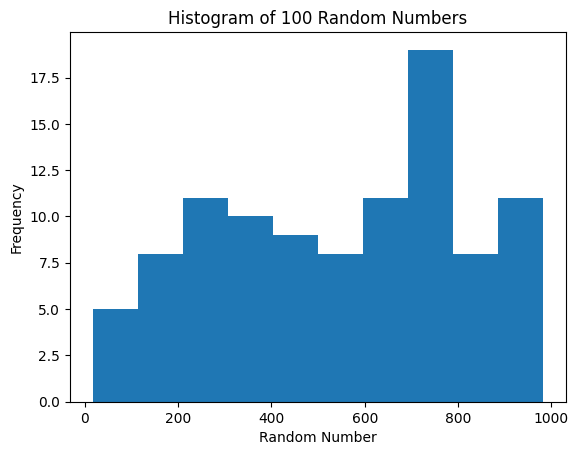

Random Numbers: [752, 194, 246, 754, 83, 423, 732, 827, 944, 252, 968, 355, 654, 305, 527, 758, 770, 717, 914, 854, 616, 728, 129, 814, 212, 487, 192, 357, 731, 66, 492, 443, 760, 897, 451, 734, 823, 714, 42, 808, 891, 936, 607, 593, 158, 951, 455, 271, 461, 890, 166, 215, 569, 262, 630, 354, 283, 402, 17, 298, 793, 361, 605, 735, 834, 750, 577, 743, 394, 483, 513, 511, 181, 226, 339, 930, 785, 636, 712, 317, 710, 677, 238, 322, 529, 950, 99, 638, 148, 799, 449, 776, 608, 707, 581, 983, 146, 652, 622, 372]

Mean: 543.65
Median: 587.0
Minimum: 17
Maximum: 983
Standard Deviation: 260.5908430854776


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 random numbers between 1 and 1000
random_numbers = random.sample(range(1, 1001), 100)

# Calculate the mean
mean = np.mean(random_numbers)

# Calculate the median
median = np.median(random_numbers)

# Calculate the mode
from scipy import stats
mode = stats.mode(random_numbers)

# Find the minimum and maximum values
minimum = min(random_numbers)
maximum = max(random_numbers)

# Calculate the standard deviation
std_dev = np.std(random_numbers)

# Create a histogram
plt.hist(random_numbers, bins=10)
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.title('Histogram of 100 Random Numbers')
plt.show()

print(f"Random Numbers: {random_numbers}\n")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Minimum: {minimum}")
print(f"Maximum: {maximum}")
print(f"Standard Deviation: {std_dev}")

In [ ]:
response=web_scraping_simulation()
Markdown(response.text)

Example 4: Web Scraping Simulation


I can do that. I will create a mock HTML string that resembles a typical product page. Then I can extract the requested information and format it as a JSON object. 

```python
html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Sample Product Page</title>
</head>
<body>
    <div class="product-page">
        <h1 id="product-name">Noise Cancelling Headphones</h1>
        <p id="product-price">$99.99</p>
        <p id="product-description">These headphones offer superior noise cancellation for an immersive audio experience. 
        They are comfortable for all-day wear and have a battery life of up to 20 hours.</p>
        <div class="customer-ratings">
            <h2>Customer Reviews</h2>
            <div class="rating">4 out of 5 stars</div>
            <div class="rating">5 out of 5 stars</div>
            <div class="rating">3 out of 5 stars</div>
        </div>
    </div>
</body>
</html>
"""
print(html_content)
```

```tool_outputs
<!DOCTYPE html>
<html>
<head>
    <title>Sample Product Page</title>
</head>
<body>
    <div class="product-page">
        <h1 id="product-name">Noise Cancelling Headphones</h1>
        <p id="product-price">$99.99</p>
        <p id="product-description">These headphones offer superior noise cancellation for an immersive audio experience. 
        They are comfortable for all-day wear and have a battery life of up to 20 hours.</p>
        <div class="customer-ratings">
            <h2>Customer Reviews</h2>
            <div class="rating">4 out of 5 stars</div>
            <div class="rating">5 out of 5 stars</div>
            <div class="rating">3 out of 5 stars</div>
        </div>
    </div>
</body>
</html>

```

```python
from bs4 import BeautifulSoup

soup = BeautifulSoup(html_content, 'html.parser')

product_name = soup.find('h1', id='product-name').text.strip()
price = soup.find('p', id='product-price').text.strip()
description = soup.find('p', id='product-description').text.strip()

ratings = [int(rating.text.split('out')[0].strip()) for rating in soup.find_all('div', class_='rating')]

average_rating = sum(ratings) / len(ratings)

product_info = {
    "product_name": product_name,
    "price": price,
    "description": description,
    "customer_ratings": ratings,
    "average_rating": average_rating
}

import json 
print(json.dumps(product_info, indent=4))
```

In [ ]:
from bs4 import BeautifulSoup

html_content = """
<html>
<head>
    <title>Product Page</title>
</head>
<body>
    <div id="product-container">
        <h1 class="product-name">Noise Cancelling Headphones</h1>
        <p class="price">$99.99</p>
        <p class="description">Immerse yourself in sound with these premium noise-cancelling headphones.
            Featuring crystal-clear audio and a comfortable fit for all-day wear.</p>
        <h2>Customer Reviews</h2>
        <div class="ratings">
            <p class="rating">4.5 out of 5 stars</p>
            <p class="rating">4 out of 5 stars</p>
            <p class="rating">5 out of 5 stars</p>
        </div>
    </div>
</body>
</html>
"""
soup = BeautifulSoup(html_content, 'html.parser')

product_name = soup.find('h1', class_='product-name').text.strip()
price = soup.find('p', class_='price').text.strip()
description = soup.find('p', class_='description').text.strip()

ratings = [float(rating.text.split(' ')[0]) for rating in soup.find_all('p', class_='rating')]
average_rating = sum(ratings) / len(ratings)

print(f'{{"product_name": "{product_name}", "price": "{price}", "description": "{description}", "average_rating": {average_rating:.2f}}}')


{"product_name": "Noise Cancelling Headphones", "price": "$99.99", "description": "Immerse yourself in sound with these premium noise-cancelling headphones. 
            Featuring crystal-clear audio and a comfortable fit for all-day wear.", "average_rating": 4.50}


In [ ]:
response=machine_learning_model()
Markdown(response.text)

Example 5: Machine Learning Model


I can do that. I will use the `sklearn` library to create a linear regression model and evaluate its performance. 

First, I will generate a synthetic dataset. I will assume a positive correlation between the features and the house price.


``` python
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(0)
size = 100
sqft = np.random.randint(800, 3000, size)
bedrooms = np.random.randint(1, 6, size)
year_built = np.random.randint(1980, 2023, size)
price = 100 * sqft + 10000 * bedrooms + 1000 * (year_built - 1980) + np.random.normal(0, 50000, size)

# Create a dictionary for the data
data = {'sqft': sqft, 'bedrooms': bedrooms, 'year_built': year_built, 'price': price}

```
```

```
Now that I have the dataset, I will split it into training and testing sets. I will use 80% of the data for training and 20% for testing.


``` python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)

# Split the data into features (X) and target variable (y)
X = df[['sqft', 'bedrooms', 'year_built']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

```
```

```
Next, I will create a linear regression model and train it on the training data:


``` python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

```
```

```
Now I will evaluate the model's performance on the test set using the mean squared error and R-squared metrics:


``` python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

```
```
Mean Squared Error: 1329502462.4921403
R-squared: 0.7108943470769955

```
The mean squared error (MSE) is quite large, but this is expected given the range of our housing prices. The R-squared value, which represents the proportion of variance in the target variable explained by the model, is 0.71, indicating a reasonable fit.

Finally, I will use the trained model to predict the price of a house with 2000 sq ft, 3 bedrooms, and built in 2010:


``` python
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Predict the price of a house with the given features
new_house = pd.DataFrame({'sqft': [2000], 'bedrooms': [3], 'year_built': [2010]})
predicted_price = model.predict(new_house)

print(f'Predicted price: ${predicted_price[0]:,.2f}')

```
```
Predicted price: $260,921.22

```
The model predicts that a house with 2000 sq ft, 3 bedrooms, and built in 2010 would cost approximately $260,921.22. Keep in mind that this is a simple model trained on synthetic data, so the prediction should not be taken as a definitive valuation. 


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. Generate synthetic dataset
np.random.seed(0)
size = 200
sqft = np.random.randint(800, 3000, size)
bedrooms = np.random.randint(1, 6, size)
year_built = np.random.randint(1980, 2023, size)
# Assume some relationship between features and price
price = 150 * sqft + 20000 * bedrooms + 5000 * (year_built - 1980) + np.random.normal(0, 50000, size)

X = np.column_stack((sqft, bedrooms, year_built))
y = price

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# 5. Predict price
new_house = np.array([[2000, 3, 2010]])
predicted_price = model.predict(new_house)
print(f"Predicted price for a 2000 sq ft, 3 bedrooms, 2010 built house: ${predicted_price[0]:,.2f}")


Mean Squared Error: 4141006686.5110703
Predicted price for a 2000 sq ft, 3 bedrooms, 2010 built house: $505,121.13
